In [1]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read in csv file
csv_file = pd.read_csv('../CSV_Files/spreadspoke_scores.csv')
nfl_df = pd.DataFrame(csv_file)
nfl_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [3]:
# Cut down DataFrame to see the last 5 years
five_year_df = nfl_df[nfl_df['schedule_season'] > 2018]
five_year_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [4]:
# Clean data to make sure names and abbreviations are all the same.
five_year_df.loc[:,'team_home'] = five_year_df.loc[:,'team_home'].replace('Oakland Raiders', 'Las Vegas Raiders')
five_year_df.loc[:,'team_home'] = five_year_df.loc[:,'team_home'].replace({'Washington Redskins' : 'Washington Commanders', 
                                                                           'Washington Football Team' : 'Washington Commanders'})
five_year_df.loc[:,'team_away'] = five_year_df.loc[:,'team_away'].replace('Oakland Raiders', 'Las Vegas Raiders')
five_year_df.loc[:,'team_away'] = five_year_df.loc[:,'team_away'].replace({'Washington Redskins' : 'Washington Commanders', 
                                                                           'Washington Football Team' : 'Washington Commanders'})
five_year_df.loc[:,'team_favorite_id'] = five_year_df.loc[:,'team_favorite_id'].replace({'LV' : 'LVR'})

five_year_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,-3.0,46.5,Soldier Field,False,NaN,NaN,NaN,NaN
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,-3.0,45.5,University of Phoenix Stadium,False,72.0,0.0,NaN,indoor
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,-2.0,49.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,-5.5,44,FirstEnergy Stadium,False,NaN,NaN,NaN,NaN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,-7.0,44,AT&T Stadium,False,72.0,0.0,NaN,indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [5]:
# Remove unnecessary columns and add new columns to be used for analysis.
clean_df = five_year_df.drop(columns=['stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
                              'weather_humidity', 'weather_detail', 'spread_favorite', 'over_under_line'])
clean_df['team_home_id'] = ''
clean_df['team_away_id'] = ''
clean_df['result'] = ''
clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,,,
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,,,
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,,,
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,,,
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,,,
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,,,
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,,,
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,,,


In [6]:
# Read in and display new DataFrame with adjusted abbreviations to use for analysis.
key_path = pd.read_csv('../CSV_Files/nfl_teams.csv')
team_key_df = pd.DataFrame(key_path)
team_key_df['Abbreviation'] = team_key_df['Abbreviation'].replace('LV', 'LVR')

team_key_df

,ID,Name,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North
3,4,Buffalo Bills,BUF,AFC,East
4,5,Carolina Panthers,CAR,NFC,South
5,6,Chicago Bears,CHI,NFC,North
6,7,Cincinnati Bengals,CIN,AFC,North
7,8,Cleveland Browns,CLE,AFC,North
8,9,Dallas Cowboys,DAL,NFC,East
9,10,Denver Broncos,DEN,AFC,West


In [7]:
# Gather team names and abbreviations into lists in order to create a new dictionary.
names = []
abbreviation = []

for index, row in team_key_df.iterrows():
    names.append(row['Name'])
    abbreviation.append(row['Abbreviation'])

name_key = dict(zip(names, abbreviation))
print(name_key)
    

{'Arizona Cardinals': 'ARI', 'Atlanta Falcons': 'ATL', 'Baltimore Ravens': 'BAL', 'Buffalo Bills': 'BUF', 'Carolina Panthers': 'CAR', 'Chicago Bears': 'CHI', 'Cincinnati Bengals': 'CIN', 'Cleveland Browns': 'CLE', 'Dallas Cowboys': 'DAL', 'Denver Broncos': 'DEN', 'Detroit Lions': 'DET', 'Green Bay Packers': 'GB', 'Houston Texans': 'HOU', 'Indianapolis Colts': 'IND', 'Jacksonville Jaguars': 'JAX', 'Kansas City Chiefs': 'KC', 'Miami Dolphins': 'MIA', 'Minnesota Vikings': 'MIN', 'New England Patriots': 'NE', 'New Orleans Saints': 'NO', 'New York Giants': 'NYG', 'New York Jets': 'NYJ', 'Las Vegas Raiders': 'LVR', 'Philadelphia Eagles': 'PHI', 'Pittsburgh Steelers': 'PIT', 'Los Angeles Chargers': 'LAC', 'San Francisco 49ers': 'SF', 'Seattle Seahawks': 'SEA', 'Los Angeles Rams': 'LAR', 'Tampa Bay Buccaneers': 'TB', 'Tennessee Titans': 'TEN', 'Washington Commanders': 'WAS'}


In [8]:
# Use dictionary we created to fill in empty columns in cleaned DataFrame.
clean_df['team_home_id'] = clean_df['team_home'].map(name_key)
clean_df['team_away_id'] = clean_df['team_away'].map(name_key)
clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,SF,DET,


In [9]:
# Determine the resulting winner of each game and include the ID in the result column.
for index, row in clean_df.iterrows():
    if row['score_home'] > row['score_away']:
        clean_df.at[index, 'result'] = row['team_home_id']
    elif row['score_home'] < row['score_away']:
        clean_df.at[index, 'result'] = row['team_away_id']
    else:
        clean_df.at[index, 'result'] = 'Tie'

clean_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,Tie
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,DAL
...,...,...,...,...,...,...,...,...,...,...,...,...
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,DET
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,KC
13799,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,SF,DET,SF


In [10]:
# Cut down data to where the favorite meets the result.
favorite_df = clean_df[clean_df['team_favorite_id'] == clean_df['result']]
favorite_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12413,9/8/2019,2019,1,False,Carolina Panthers,27,30,Los Angeles Rams,LAR,CAR,LAR,LAR
12415,9/8/2019,2019,1,False,Dallas Cowboys,35,17,New York Giants,DAL,DAL,NYG,DAL
12416,9/8/2019,2019,1,False,Jacksonville Jaguars,26,40,Kansas City Chiefs,KC,JAX,KC,KC
12417,9/8/2019,2019,1,False,Los Angeles Chargers,30,24,Indianapolis Colts,LAC,LAC,IND,LAC
12418,9/8/2019,2019,1,False,Miami Dolphins,10,59,Baltimore Ravens,BAL,MIA,BAL,BAL
...,...,...,...,...,...,...,...,...,...,...,...,...
13792,1/15/2024,2023,Wildcard,True,Buffalo Bills,31,17,Pittsburgh Steelers,BUF,BUF,PIT,BUF
13794,1/20/2024,2023,Division,True,Baltimore Ravens,34,10,Houston Texans,BAL,BAL,HOU,BAL
13795,1/20/2024,2023,Division,True,San Francisco 49ers,24,21,Green Bay Packers,SF,SF,GB,SF
13797,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,DET


In [11]:
# Group the data by the ID's in the result column.
favorite_df = favorite_df.groupby('result')
favorite_df

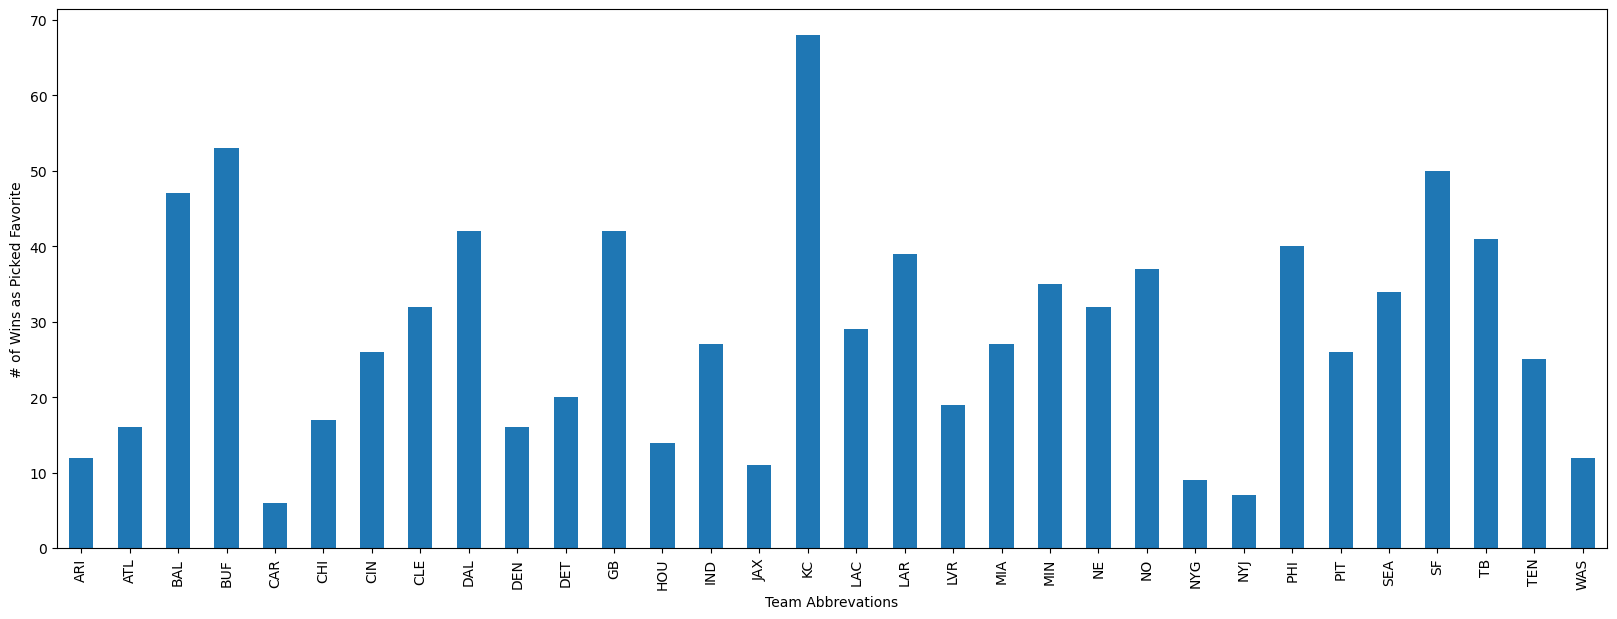

In [12]:
# Get the counts for each team and disply them in a bar chart to show which favorites hit the moneyline the most.
favorite_df['result'].count().plot(kind='bar', figsize=(20,7))
plt.xlabel('Team Abbrevations')
plt.ylabel('# of Wins as Picked Favorite')
plt.show()

In [13]:
# Cut down cleaned data to where the underdog won instead of the favorite.
underdog_df = clean_df[clean_df['team_favorite_id'] != clean_df['result']]
underdog_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
12411,9/5/2019,2019,1,False,Chicago Bears,3,10,Green Bay Packers,CHI,CHI,GB,GB
12412,9/8/2019,2019,1,False,Arizona Cardinals,27,27,Detroit Lions,DET,ARI,DET,Tie
12414,9/8/2019,2019,1,False,Cleveland Browns,13,43,Tennessee Titans,CLE,CLE,TEN,TEN
12421,9/8/2019,2019,1,False,New York Jets,16,17,Buffalo Bills,NYJ,NYJ,BUF,BUF
12424,9/8/2019,2019,1,False,Tampa Bay Buccaneers,17,31,San Francisco 49ers,TB,TB,SF,SF
...,...,...,...,...,...,...,...,...,...,...,...,...
13790,1/14/2024,2023,Wildcard,True,Dallas Cowboys,32,48,Green Bay Packers,DAL,DAL,GB,GB
13793,1/15/2024,2023,Wildcard,True,Tampa Bay Buccaneers,32,9,Philadelphia Eagles,PHI,TB,PHI,TB
13796,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC
13798,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,KC


In [14]:
# Eliminate games from the data that resulted in Ties and group by the abbreviations in result again.
underdog_df = underdog_df[underdog_df['result'] != 'Tie']
underdog_df = underdog_df.groupby('result')

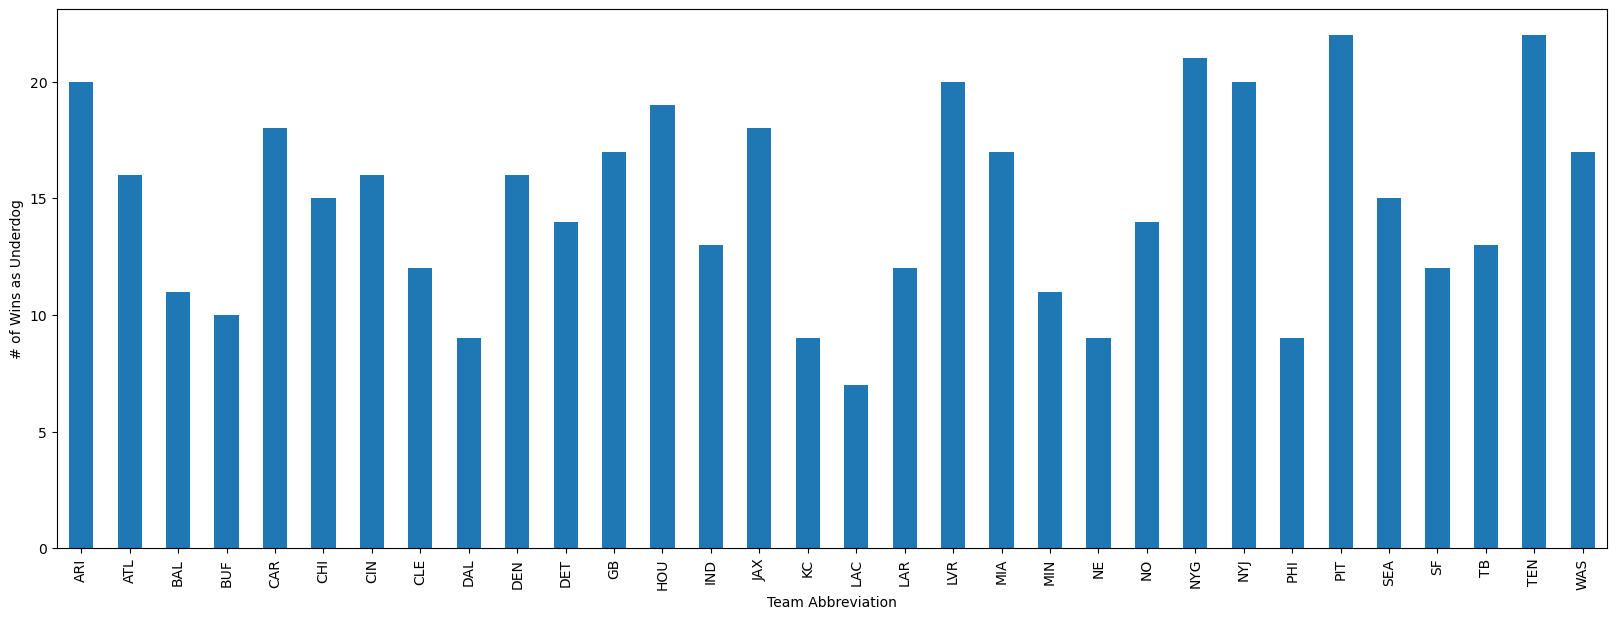

In [15]:
# Plot the counts for each team that won as an underdog.
underdog_df['result'].count().plot(kind='bar', figsize=(20,7))
plt.xlabel('Team Abbreviation')
plt.ylabel('# of Wins as Underdog')
plt.show()

In [30]:
outcome_df = pd.DataFrame(favorite_df['result'].count())
outcome_df = outcome_df.rename(columns={'result' : 'favorite win count'})
outcome_df['underdog win count'] = ''
outcome_df['underdog win count'] = underdog_df['result'].count()
outcome_df

,favorite win count,underdog win count
result,,
ARI,12,20
ATL,16,16
BAL,47,11
BUF,53,10
CAR,6,18
CHI,17,15
CIN,26,16
CLE,32,12
DAL,42,9


In [31]:
outcome_df['total wins'] = outcome_df[outcome_df['favorite win count'] + outcome_df['underdog win count']]
outcome_df

KeyError: "None of [Index([32, 32, 58, 63, 24, 32, 42, 44, 51, 32, 34, 59, 33, 40, 29, 77, 36, 51,\n       39, 44, 46, 41, 51, 30, 27, 49, 48, 49, 62, 54, 47, 29],\n      dtype='int64')] are in the [columns]"